In [ ]:
using Plots
using LinearAlgebra: norm
# using LsqFit
using Statistics

using Revise
using LilGuys

In [5]:
filename = "/cosma/home/durham/dc-boye1/data/mc_orbits/sculptor/out"
out = Output(filename);


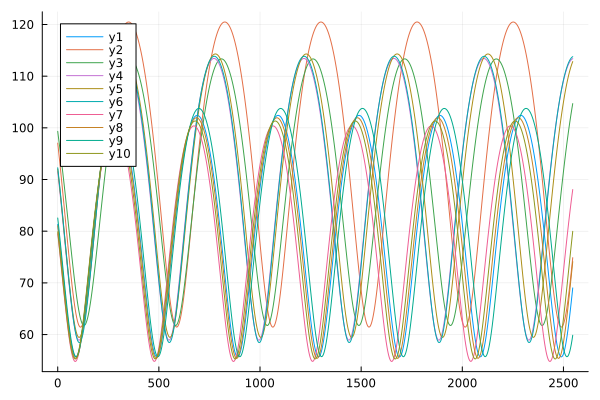

In [6]:
i = 1:10
ps = out[:, i]
r = [norm(p.pos) for p in ps]
plot(out.time, r)
# hline!([apos[i], peris[i]])

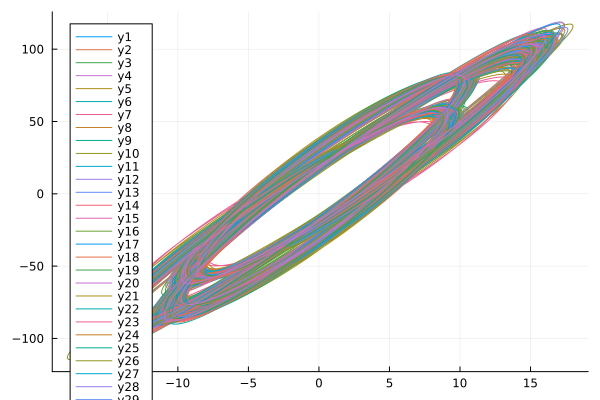

In [7]:
ps = out[:, 1:100]
x = [p.pos[1] for p in ps]
y = [p.pos[2] for p in ps]

plot(x, y)

In [8]:
max.(ones(3), [0, 1, 2])

3-element Vector{Float64}:
 1.0
 1.0
 2.0

In [9]:
function peris_apos(out::Output)
    Nt, Np = size(out)
    
    r0 = [norm(p.pos) for p in out[1, :]]
    peris = r0
    apos = r0

    println("begining")
    for i in 2:Nt
        if i % 100 == 0
            print("$(i)/$(Nt)\r")
        end
        
        ps = out[i, :]
        r = [norm(p.pos) for p in ps]
        apos = max.(apos, r)
        peris = min.(peris, r)
    end
    
    println("\r finished")
    return peris, apos  
end

peris_apos (generic function with 1 method)

In [10]:
peris, apos = peris_apos(out)

begining
 finished


([55.680988566026876, 61.438753877024624, 61.75079805389392, 58.9102830076044, 59.452884704769794, 58.446469736848165, 54.79647747034471, 55.39351857645665, 55.71041039058732, 55.2726707230195  …  59.646013128869484, 53.127560944927566, 54.40084129690287, 53.93421334253601, 57.62723941375185, 55.50362927488434, 57.54326841343261, 54.601503134869084, 54.91224588224647, 57.64030805329295], [102.41857590324935, 120.48704044485815, 113.34828719336025, 113.43331071943702, 114.3027798473253, 113.85228257299886, 100.37919127774823, 101.95429106446021, 103.76167493206472, 101.3315893675697  …  118.31198772483324, 96.23122515516778, 100.18224448994137, 98.2255258133813, 110.11899793791335, 102.15140545559295, 108.86588135458481, 101.37327928746481, 101.88245930466528, 110.25304077026892])

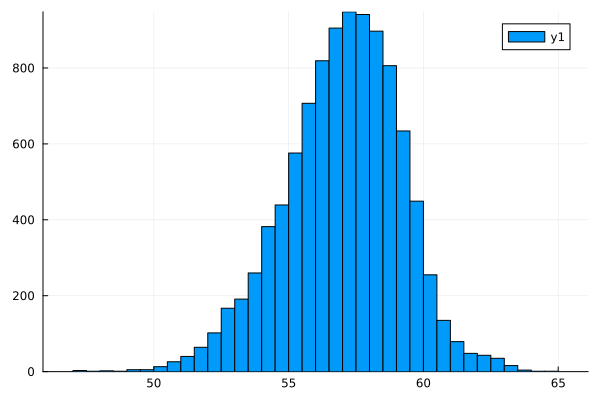

In [11]:
histogram(peris)

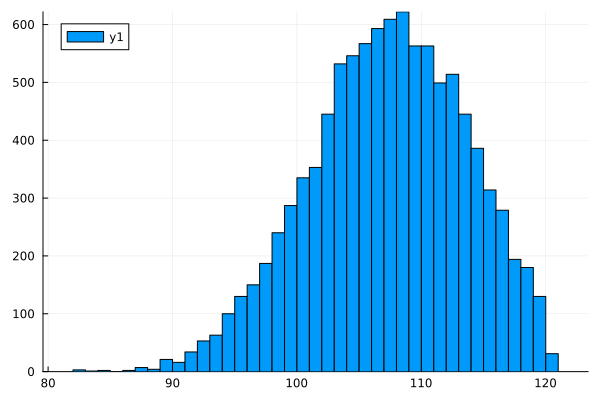

In [12]:
histogram(apos)

In [ ]:
phases = PhasePoint[]
observations = LilGuys.Observation[]
snap1 = out[1, :]

for i in length(snap1)
    print(i, "\r")
    particle = snap1[i]
    phase = PhasePoint(particle.pos, -1 * particle.vel)
    push!(phases, phase)
    obs = to_sky(phase)
    push!(observations, obs)
end

In [15]:
normal_dist(x, μ, σ) = 1/√(2π) * 1/σ * exp(-(x-μ)^2/2σ^2)

normal_dist (generic function with 1 method)

In [ ]:

for sym in [:pm_ra, :pm_dec, :distance, :radial_velocity]
    x = [getproperty(o, sym) for o in observations]
    p = histogram(x, normalize=:pdf)

    μ = mean(x)
    σ = std(x)
    
    x_mod = LinRange(μ - 3σ, μ + 3σ, 1000)
    y_mod = normal_dist.(x_mod, μ, σ)
    plot!(p, x_mod, y_mod, z_order=2, lw=2)
    title!(p, string(sym))

    display(p)
end

In [ ]:

for sym in [:pm_ra, :pm_dec, :distance, :radial_velocity]
    x = [getproperty(o, sym) for o in observations]
    y = peris
    p = scatter(x, y, ms=0.3)
    title!(p, string(sym))
    display(p)
end

In [73]:
?LilGuys.rand_coords

No documentation found.

`LilGuys.rand_coords` is a `Function`.

```
# 1 method for generic function "rand_coords" from LilGuys:
 [1] rand_coords(obs::LilGuys.Observation, err::LilGuys.Observation, N::Int64)
     @ ~/dwarfs/LilGuys/src/coordinates.jl:124
```


In [2]:
include("/cosma/home/durham/dc-boye1/data/mc_orbits/sculptor/sample.jl")

[ Info: Precompiling LilGuys [1391d4f3-b950-46e7-ae93-86515cdc2b0b]


In [3]:
snap_sample = sample()

LoadError: UndefVarError: `Snapshot` not defined